<a href="https://colab.research.google.com/github/iSanoussi/Classes-and-tests/blob/main/Cr%C3%A9ation_indicateur_rse_transport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemple : Création d'un indicateur RSE sur le transport

## Import du dépôt Gitea 'Echantillons_db_siren'

In [ ]:
!git clone https://vcs.management-datascience.org/a.alfocea/db_siren_cours_mscdm.git

Cloning into 'db_siren_cours_mscdm'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 3), reused 0 (delta 0)
Unpacking objects: 100% (19/19), done.
Checking out files: 100% (12/12), done.


In [ ]:
!git clone https://vcs.management-datascience.org/a.alfocea/Echantillons_db_siren.git

Cloning into 'Echantillons_db_siren'...
fatal: could not read Username for 'https://vcs.management-datascience.org': No such device or address


## Import des fichiers csv dans des dataframes pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

te_siren_adresse = pd.read_csv('/content/db_siren_cours_mscdm/db_siren_cours_mscdm_2/te_siren_adresse.csv', dtype = {'codePostalEtablissement' : 'object', 'codeCommuneEtablissement' : 'object', 'codeCedexEtablissement' : 'object' } )
te_siren_admin = pd.read_csv('/content/db_siren_cours_mscdm/db_siren_cours_mscdm_2/te_siren_admin.csv')
tr_code_effectif = pd.read_csv('/content/db_siren_cours_mscdm/db_siren_cours_mscdm_2/tr_code_effectif.csv')
tr_naf = pd.read_csv('/content/db_siren_cours_mscdm/db_siren_cours_mscdm_2/tr_naf.csv')
tr_nap = pd.read_csv('/content/db_siren_cours_mscdm/db_siren_cours_mscdm_2/tr_nap.csv', dtype = {'activitePrincipaleEtablissement' : 'object'})


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
len(te_siren_admin)

1095681

In [ ]:
te_siren_adresse.head()

,siren,nic,siret,complementAdresseEtablissement,numeroVoieEtablissement,indiceRepetitionEtablissement,typeVoieEtablissement,libelleVoieEtablissement,codePostalEtablissement,libelleCommuneEtablissement,libelleCommuneEtrangerEtablissement,distributionSpecialeEtablissement,codeCommuneEtablissement,codeCedexEtablissement,libelleCedexEtablissement,codePaysEtrangerEtablissement,libellePaysEtrangerEtablissement,dateDernierTraitementEtablissement
0,807626460,24,80762646000024,LA TOUCHE,NaN,NaN,RTE,DE LINERS,16200.0,BOURG-CHARENTE,NaN,NaN,16056,NaN,NaN,NaN,NaN,2020-08-25 11:15:49
1,807639737,12,80763973700012,NaN,4.0,B,NaN,GRANDE RUE,91600.0,SAVIGNY-SUR-ORGE,NaN,NaN,91589,NaN,NaN,NaN,NaN,2020-08-25 11:15:49
2,807651666,16,80765166600016,NaN,3.0,NaN,RUE,ANDRE HUYS,59100.0,ROUBAIX,NaN,NaN,59512,NaN,NaN,NaN,NaN,2020-08-25 11:15:50
3,807658679,20,80765867900020,HAMEAU DE SERRIERES,11.0,NaN,RUE,DU MOULIN,1230.0,SAINT-RAMBERT-EN-BUGEY,NaN,NaN,01384,NaN,NaN,NaN,NaN,2021-02-23 17:23:06
4,807663893,38,80766389300038,ZI BEL AIR,9.0,NaN,RUE,DE L'ETANG,97450.0,SAINT-LOUIS,NaN,NaN,97414,NaN,NaN,NaN,NaN,2021-02-23 17:23:07


In [ ]:
te_siren_admin.head()

,siren,nic,siret,dateCreationEtablissement,trancheEffectifsEtablissement,anneeEffectifsEtablissement,activitePrincipaleRegistreMetiersEtablissement,dateDernierTraitementEtablissement,etablissementSiege,nombrePeriodesEtablissement,dateDebut,etatAdministratifEtablissement,enseigne1Etablissement,enseigne2Etablissement,enseigne3Etablissement,denominationUsuelleEtablissement,activitePrincipaleEtablissement,nomenclatureActivitePrincipaleEtablissement,caractereEmployeurEtablissement
0,5420120,15,542012000015,1989-01-27 00:00:00,2,2018.0,NaN,2020-08-25 10:10:13,False,4,2008-01-01 00:00:00,A,NaN,NaN,NaN,NaN,10.81Z,NAFRev2,O
1,5420120,31,542012000031,1900-01-01 00:00:00,3,2018.0,NaN,2021-01-01 03:35:01,True,6,2008-04-23 00:00:00,A,NaN,NaN,NaN,NaN,70.10Z,NAFRev2,O
2,5520176,16,552017600016,1955-01-01 00:00:00,12,2018.0,NaN,2021-08-01 21:30:57,True,4,2008-01-01 00:00:00,A,NaN,NaN,NaN,NaN,17.21A,NAFRev2,O
3,5520176,32,552017600032,1999-08-30 00:00:00,12,2018.0,NaN,2020-08-25 10:10:13,False,4,2008-01-01 00:00:00,A,NaN,NaN,NaN,NaN,17.21A,NAFRev2,O
4,5520242,16,552024200016,1900-01-01 00:00:00,12,2018.0,NaN,2021-08-01 21:30:57,True,4,2008-01-01 00:00:00,A,NaN,NaN,NaN,NaN,20.30Z,NAFRev2,O


In [ ]:
te_siren_admin[te_siren_admin['nomenclatureActivitePrincipaleEtablissement'].isin(["NAFRev2","NAF1993"]) == False]

,siren,nic,siret,dateCreationEtablissement,trancheEffectifsEtablissement,anneeEffectifsEtablissement,activitePrincipaleRegistreMetiersEtablissement,dateDernierTraitementEtablissement,etablissementSiege,nombrePeriodesEtablissement,dateDebut,etatAdministratifEtablissement,enseigne1Etablissement,enseigne2Etablissement,enseigne3Etablissement,denominationUsuelleEtablissement,activitePrincipaleEtablissement,nomenclatureActivitePrincipaleEtablissement,caractereEmployeurEtablissement


In [ ]:
.tr_code_effectif.head()

,trancheEffectifsEtablissement,effectif
0,1,1 ou 2 salariés
1,2,3 à 5 salariés
2,3,6 à 9 salariés
3,11,10 à 19 salariés
4,12,20 à 49 salariés


In [ ]:
tr_naf.head()

,activitePrincipaleEtablissement,Libellé
0,01.11Z,"Culture de céréales (à l'exception du riz), de..."
1,01.12Z,Culture du riz
2,01.13Z,"Culture de légumes, de melons, de racines et d..."
3,01.14Z,Culture de la canne à sucre
4,01.15Z,Culture du tabac


In [ ]:
tr_nap.head()

,activitePrincipaleEtablissement,LibelleClasse,LibelleGroupe,LibelleDivision,LibelleSection
0,01.00,Cultures générales,Agriculture,"Agriculture, sylviculture, pêche","Agriculture, sylviculture, pêche"
1,01.07,Cultures générales associées à d'autres activi...,Agriculture,"Agriculture, sylviculture, pêche","Agriculture, sylviculture, pêche"
2,01.10,"Production de légumes frais, de fleurs; pépini...",Agriculture,"Agriculture, sylviculture, pêche","Agriculture, sylviculture, pêche"
3,01.16,Cultures fruitières,Agriculture,"Agriculture, sylviculture, pêche","Agriculture, sylviculture, pêche"
4,01.17,Viticulture,Agriculture,"Agriculture, sylviculture, pêche","Agriculture, sylviculture, pêche"


## Création d'une liste de code NAF (depuis 2008) d'activités de transport

In [ ]:
code_naf_transport = tr_naf[tr_naf['Libellé'].str.contains('Transports')]['activitePrincipaleEtablissement']

code_naf_transport.head(10)

485    49.20Z
486    49.31Z
487    49.32Z
488    49.39A
491    49.41A
492    49.41B
495    49.50Z
496    50.10Z
497    50.20Z
498    50.30Z
Name: activitePrincipaleEtablissement, dtype: object

## Création d'une liste de code NAP (1973-1993) d'activités de transport

In [ ]:
code_nap_transport = tr_nap[tr_nap['LibelleDivision'].str.contains('Transports')]['activitePrincipaleEtablissement']

code_nap_transport.head(10)

429    68.01
430    69.11
431    69.12
432    69.21
433    69.22
434    69.23
435    69.24
436    69.25
437    69.26
438    70.01
Name: activitePrincipaleEtablissement, dtype: object

# Création d'une table indicateur RSE transport

## Création d'une table siret + activité

In [ ]:
te_siret_transport = te_siren_admin[['siret', 'activitePrincipaleEtablissement']]
te_siret_transport.head(10)

,siret,activitePrincipaleEtablissement
0,32517500016,32.12Z
1,32517500024,47.89Z
2,32517500032,32.12Z
3,32517500040,32.12Z
4,32517500057,32.12Z
5,32517500065,32.12Z
6,180725400014,95.24Z
7,180725400022,85.59A
8,541022000015,22.02
9,541034500010,79.06


## Création d'une colonne indicateur_transport : 1 si l'entreprise a une activité de transport, 0 si non.

## Méthode 1 : apply

In [ ]:
te_siret_transport['indicateur_transport'] = te_siret_transport['activitePrincipaleEtablissement'].apply(lambda a: 1 if (a in code_naf_transport.values) or (a in code_nap_transport.values) else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Méthode 2 : list

In [ ]:
te_siret_transport['indicateur_transport'] = [1 if (a in code_naf_transport.values) or (a in code_nap_transport.values) else 0 for a in te_siret_transport['activitePrincipaleEtablissement']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
te_siret_transport.query('indicateur_transport == 1')

,siret,activitePrincipaleEtablissement,indicateur_transport
88,544084700019,69.22,1
100,544124100014,69.11,1
106,544139900010,69.12,1
128,547019000017,69.12,1
181,547420000010,69.12,1
...,...,...,...
4646,657345500018,69.23,1
4691,658003900011,74.03,1
4869,664191400012,69.11,1
4900,667011100019,69.23,1


## Nouvelle table avec un indicateur RSE sur l'activité de transport

In [ ]:
te_siret_transport

,siret,activitePrincipaleEtablissement,indicateur_transport
0,32517500016,32.12Z,0
1,32517500024,47.89Z,0
2,32517500032,32.12Z,0
3,32517500040,32.12Z,0
4,32517500057,32.12Z,0
...,...,...,...
4995,667289300028,69.12,1
4996,667296800036,49.05,0
4997,667301600017,70.2C,0
4998,667307300018,38.40,0


Nous avons créé une nouvelle table sur les entreprises ayant une activité principale de transport. Cette table peut être ajoutée dans notre base de données relationnelle avec le numéro SIRET comme clé d'identification.
Notre nouvelle table 'te_siret_transport' comporte 3 colonnes : le numéro SIRET de l'entreprise, l'activité principale, ainsi qu'un indicateur binaire sur l'activité de transport.

## Exporter la table

In [ ]:
te_siret_transport.to_csv('/content/exemple_te_siret_transport.csv', index = False, header = True)

## Exploration de données

### Nombre d'entreprise par activité de transport

In [ ]:
nb_siret_par_act_transport = te_siret_transport.query('indicateur_transport == 1')[['activitePrincipaleEtablissement','indicateur_transport']].groupby('activitePrincipaleEtablissement').count()
nb_siret_par_act_transport

,indicateur_transport
activitePrincipaleEtablissement,
49.32Z,2
49.39A,7
49.41A,4
49.41B,3
69.11,17
69.12,16
69.22,5
69.23,18
69.25,2


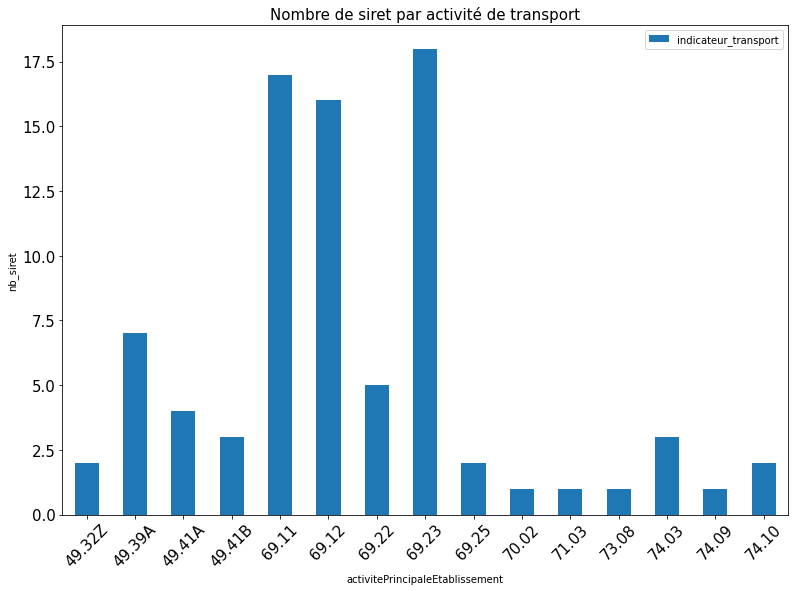

In [ ]:
nb_siret_par_act_transport.plot.bar(figsize=(13,9), rot = 45, ylabel= 'nb_siret', fontsize = 15)
plt.title("Nombre de siret par activité de transport", fontsize=15)
plt.show()

### Jointure de la commune et son code postal

In [ ]:
te_siren_adresse['codePostalEtablissement'] = te_siren_adresse['codePostalEtablissement'].apply(lambda x: ''.join('0'+str(x)) if len(str(x)) == 6 else x)
te_siren_adresse['codeCommuneEtablissement'] = te_siren_adresse['codeCommuneEtablissement'].apply(lambda x: ''.join('0'+str(x)) if len(str(x)) == 6 else x)
te_siren_adresse['codeCedexEtablissement'] = te_siren_adresse['codeCedexEtablissement'].apply(lambda x: ''.join('0'+str(x)) if len(str(x)) == 6 else x)

In [ ]:
te_siret_transport_codepostal = te_siret_transport.query('indicateur_transport == 1').merge(te_siren_adresse[['siret', 'libelleCommuneEtablissement', 'codePostalEtablissement']], how='left', on ='siret')
te_siret_transport_codepostal

,siret,activitePrincipaleEtablissement,indicateur_transport,libelleCommuneEtablissement,codePostalEtablissement
0,544084700019,69.22,1,VERDACHES,04140.0
1,544124100014,69.11,1,SISTERON,04200.0
2,544139900010,69.12,1,LA MURE-ARGENS,04170.0
3,547019000017,69.12,1,LE CROISIC,44490.0
4,547420000010,69.12,1,HERBIGNAC,44410.0
...,...,...,...,...,...
78,657345500018,69.23,1,LA BAULE-ESCOUBLAC,44500.0
79,658003900011,74.03,1,SAINT-NAZAIRE,44600.0
80,664191400012,69.11,1,GREOUX-LES-BAINS,04800.0
81,667011100019,69.23,1,SAINT-NAZAIRE,44600.0


### Top 10 des communes où les entreprises de transport ont un établissement

In [ ]:
nb_siret_par_codepostal = te_siret_transport_codepostal[['siret','codePostalEtablissement']].groupby('codePostalEtablissement').count()
top_10_nb_siret_par_codepostal = nb_siret_par_codepostal.sort_values(by='siret', ascending = False).head(10)
top_10_nb_siret_par_codepostal

,siret
codePostalEtablissement,
44600.0,10
04200.0,6
80100.0,6
44500.0,5
44410.0,3
44490.0,3
04170.0,3
44220.0,3
04400.0,3


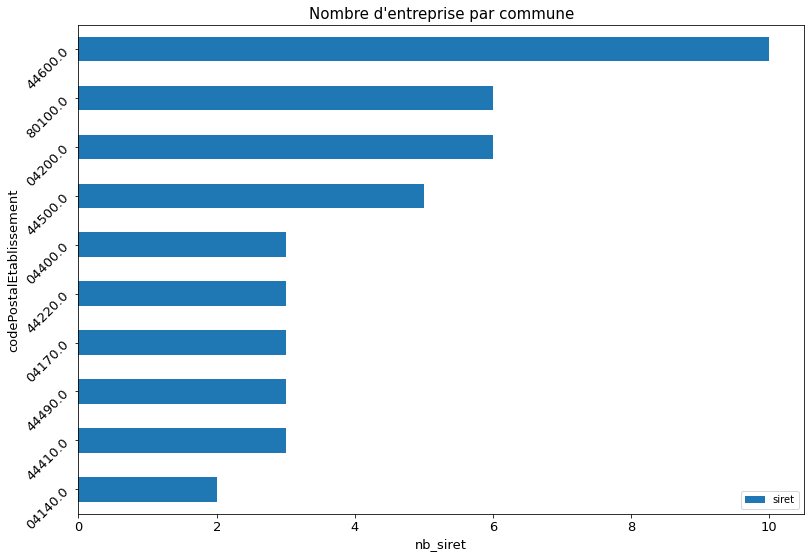

In [ ]:
top_10_nb_siret_par_codepostal.sort_values(by='siret').plot.barh(figsize=(13,9), fontsize=13, rot = 45)
plt.title("Nombre d'entreprise par commune", fontsize=15)
plt.xlabel('nb_siret', fontsize=13)
plt.ylabel('codePostalEtablissement', fontsize=13)
plt.show()